In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/product.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15009 entries, 0 to 15008
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           15009 non-null  object 
 1   meanPriceEach  15009 non-null  float64
 2   totalOrder     15009 non-null  float64
 3   orderType_1    15009 non-null  float64
 4   orderType_2    15009 non-null  float64
 5   orderType_3    15009 non-null  float64
 6   totalBundle    15009 non-null  float64
 7   bundleType_1   15009 non-null  float64
 8   bundleType_2   15009 non-null  float64
 9   customerType   15009 non-null  object 
 10  FY             15009 non-null  int64  
 11  Country        15009 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 1.4+ MB


In [3]:
DF.head()

,Date,meanPriceEach,totalOrder,orderType_1,orderType_2,orderType_3,totalBundle,bundleType_1,bundleType_2,customerType,FY,Country
0,2015-01-04,1.56,58065.35,10049.66,25228.37,3672.89,19114.43,17280.89,1833.54,Online,2015,25
1,2015-01-04,1.10,2578275.12,575245.44,1311502.53,181058.65,510468.50,429166.89,80986.81,Offline,2015,25
2,2015-01-11,1.17,2335986.11,560119.16,1032606.49,191515.19,551745.27,465764.93,85966.27,Offline,2015,25
3,2015-01-11,1.52,65483.08,14570.74,30445.75,3170.11,17296.48,16715.45,581.03,Online,2015,25
4,2015-01-18,1.65,52559.10,11415.28,25306.56,3345.08,12492.18,10971.43,1520.75,Online,2015,25


In [4]:
DF.customerType.value_counts()

Offline    7506
Online     7503
Name: customerType, dtype: int64

In [66]:
DF1 = DF[['totalBundle', 'totalOrder', 'meanPriceEach', 'Country', 'customerType']]
DF1.head()

,totalBundle,totalOrder,meanPriceEach,Country,customerType
0,19114.43,58065.35,1.56,25,Online
1,510468.50,2578275.12,1.10,25,Offline
2,551745.27,2335986.11,1.17,25,Offline
3,17296.48,65483.08,1.52,25,Online
4,12492.18,52559.10,1.65,25,Online


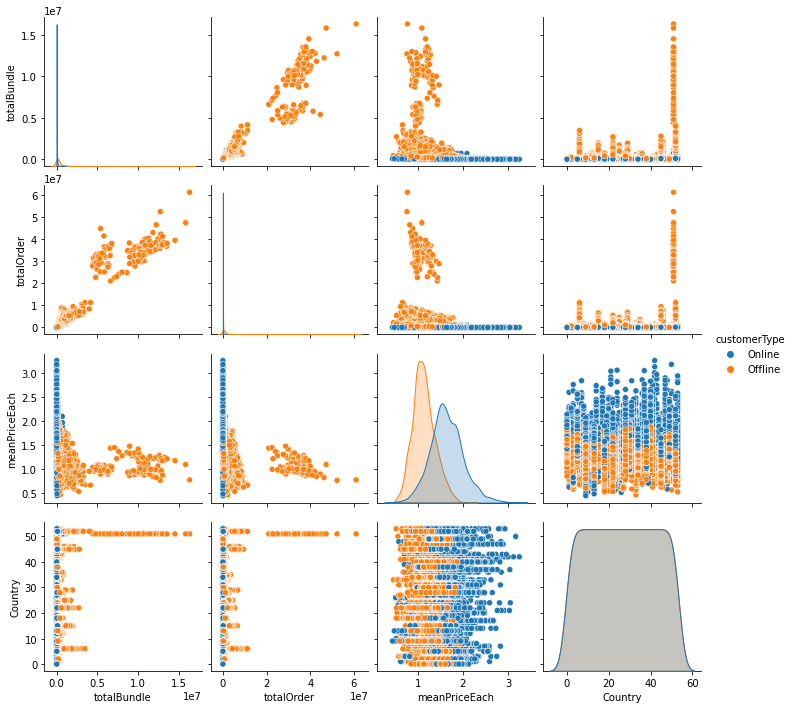

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(hue='customerType', data=DF1)
plt.show()

## Logistic Regression

In [5]:
X = DF[['totalBundle', 'totalOrder', 'meanPriceEach', 'Country']]
y = DF['customerType']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=2045)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10506, 4) (10506,)
(4503, 4) (4503,)


In [7]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
y_hat1 = model1.predict(X_test)

print(y_hat1)

['Online' 'Offline' 'Offline' ... 'Offline' 'Online' 'Online']


In [9]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat1)

array([[1983,  244],
       [ 253, 2023]])

In [10]:
from sklearn.metrics import accuracy_score

accuracy_score1 = accuracy_score(y_test, y_hat1)
print(accuracy_score1)

0.8896291361314679


In [12]:
from sklearn.metrics import f1_score

f1_score1 = f1_score(y_test, y_hat1, pos_label='Online')
print(f1_score1)

0.8906009244992296


## Decision Tree

In [13]:
X = DF[['totalBundle', 'totalOrder', 'meanPriceEach', 'Country']]
y = DF['customerType']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=2045)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10506, 4) (10506,)
(4503, 4) (4503,)


In [15]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(random_state=2045)
model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2045, splitter='best')

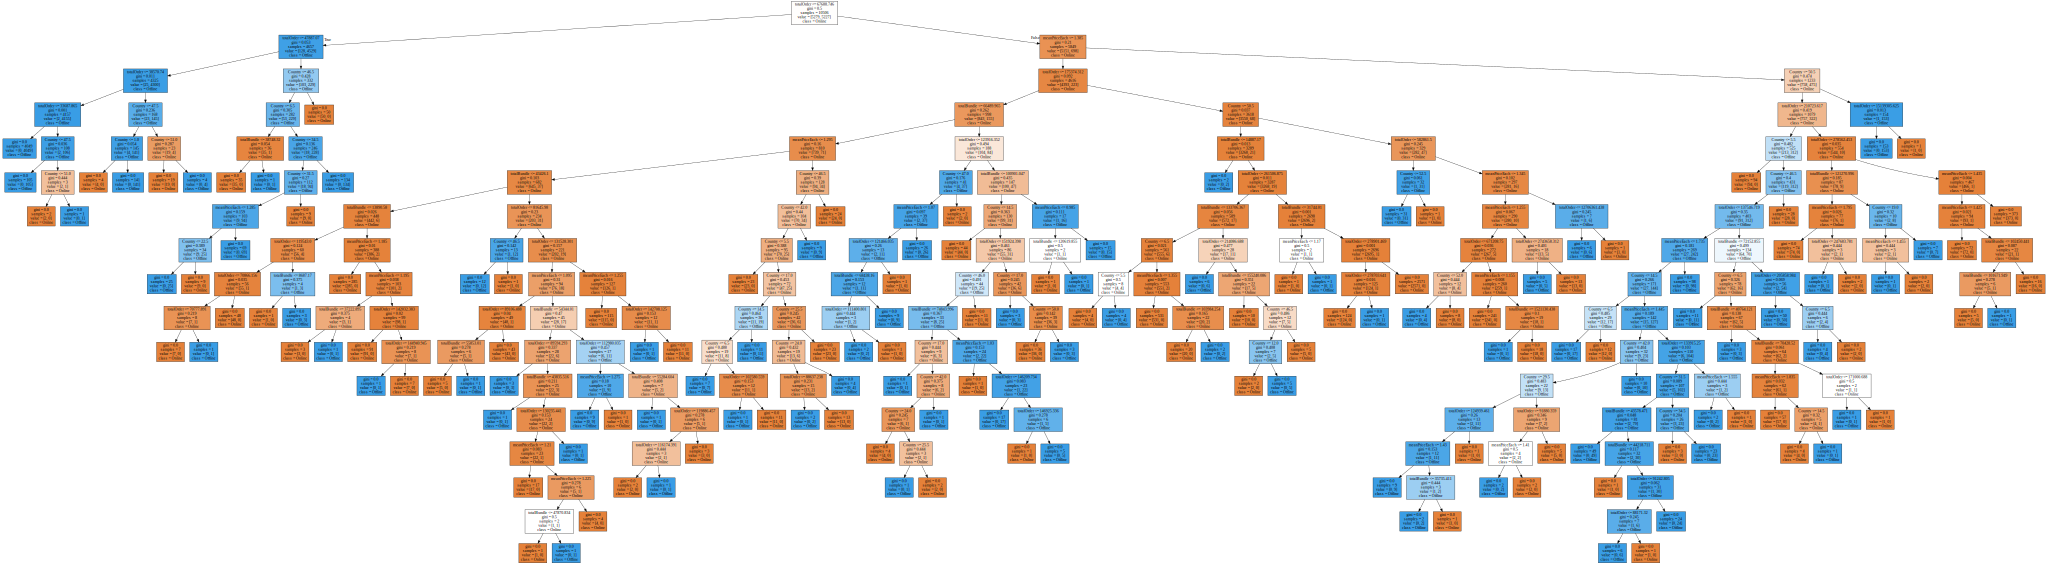

In [16]:
from sklearn.tree import export_graphviz
import graphviz

graphviz.Source(export_graphviz(model2,
                                class_names=(['Online', 'Offline']),
                                feature_names=(['totalBundle', 'totalOrder', 'meanPriceEach', 'Country']),
                                filled = True))

In [17]:
y_hat2 = model2.predict(X_test)

y_hat2

array(['Online', 'Offline', 'Offline', ..., 'Offline', 'Online', 'Online'],
      dtype=object)

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat2)

array([[2204,   23],
       [  37, 2239]])

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score2 = accuracy_score(y_test, y_hat2)
print(accuracy_score2)

0.9866755496335776


In [21]:
from sklearn.metrics import f1_score

f1_score2 = f1_score(y_test, y_hat2, pos_label='Online')
print(f1_score2)

0.9867783164389599


## Decision Tree with max_depth

In [54]:
from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier(max_depth=7, random_state=2045)
model3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2045, splitter='best')

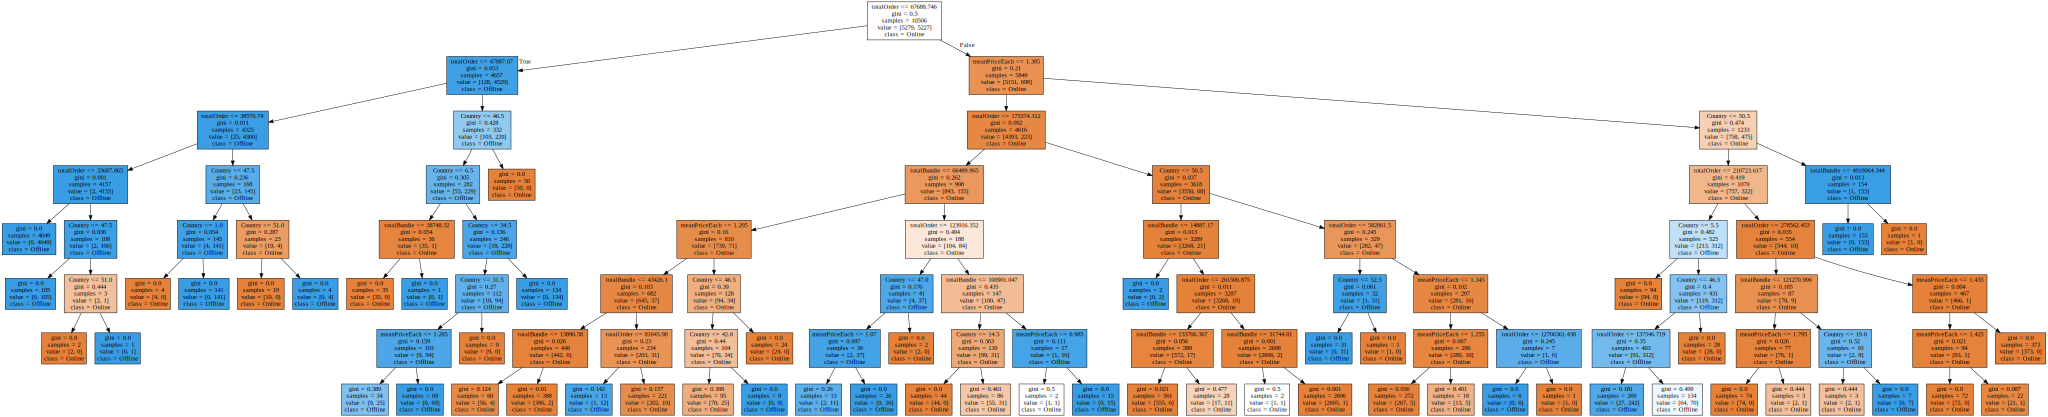

In [55]:
from sklearn.tree import export_graphviz
import graphviz

graphviz.Source(export_graphviz(model3,
                                class_names=(['Online', 'Offline']),
                                feature_names=(['totalBundle', 'totalOrder', 'meanPriceEach', 'Country']),
                                filled = True))

In [56]:
y_hat3 = model3.predict(X_test)

y_hat3

array(['Online', 'Offline', 'Offline', ..., 'Offline', 'Online', 'Online'],
      dtype=object)

In [57]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat3)

array([[2156,   71],
       [  70, 2206]])

In [58]:
from sklearn.metrics import accuracy_score

accuracy_score3 = accuracy_score(y_test, y_hat3)
print(accuracy_score3)

0.9686875416389074


In [59]:
from sklearn.metrics import f1_score

f1_score3 = f1_score(y_test, y_hat3, pos_label='Online')
print(f1_score3)

0.9690314078629475


## 비교

In [63]:
print(f'LogisticRegression Accuracy : {accuracy_score1:.3f}')
print(f'DecisionTree Accuracy : {accuracy_score2:.3f}')
print(f'DecisionTree with max_depth Accuracy : {accuracy_score3:.3f}')

LogisticRegression Accuracy : 0.890
DecisionTree Accuracy : 0.987
DecisionTree with max_depth Accuracy : 0.969


In [62]:
print(f'LogisticRegression F1-Score : {f1_score1:.3f}')
print(f'DecisionTree F1-Score : {f1_score2:.3f}')
print(f'DecisionTree with max_depth F1-Score : {f1_score3:.3f}')

LogisticRegression F1-Score : 0.891
DecisionTree F1-Score : 0.987
DecisionTree with max_depth F1-Score : 0.969


## feature importances

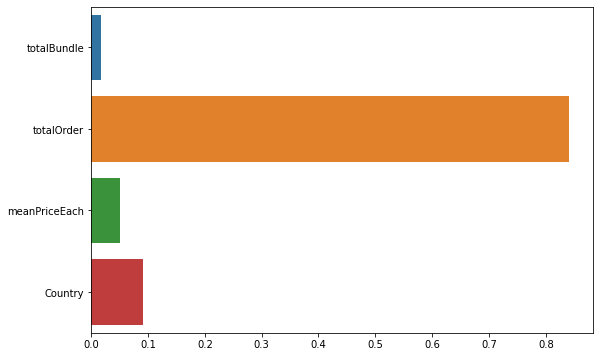

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 6))
sns.barplot(model3.feature_importances_,
            ['totalBundle', 'totalOrder', 'meanPriceEach', 'Country'])
plt.show()